In [2]:
import os
from os import path as osp
import torch
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
def iou(box_a, box_b):
    # IoU between two boxes
    box_a = box_a[1:5] if len(box_a) != 4 else box_a
    box_b = box_b[1:5] if len(box_b) != 4 else box_b

    x_a = np.max((box_a[0], box_b[0]))
    y_a = np.max((box_a[1], box_b[1]))
    x_b = np.min((box_a[2], box_b[2]))
    y_b = np.min((box_a[3], box_b[3]))

    inter_area = np.max((0., x_b - x_a + 1)) * np.max((0., y_b - y_a + 1))
    box_a_area = (box_a[2] - box_a[0] + 1) * (box_a[3] - box_a[1] + 1)
    box_b_area = (box_b[2] - box_b[0] + 1) * (box_b[3] - box_b[1] + 1)
    a = (box_a_area + box_b_area - inter_area)
    res = inter_area / a
    return res

In [4]:
dataset_path = "/data/alov"
gt = osp.join(dataset_path, "groundtruth")
dataset = dict()
groundtruth_path = osp.join(dataset_path, 'groundtruth')

In [6]:
for folder in sorted(os.listdir(dataset_path)):
    if folder == 'groundtruth': continue
    for f in sorted(os.listdir(osp.join(dataset_path, folder))):
        _path = osp.join(dataset_path, folder, f)
        _gt_path = osp.join(groundtruth_path, folder, f+".ann")
        dataset[f] = (sorted([osp.join(_path, x) for x in os.listdir(_path)]), _gt_path)

In [12]:
file2tensor(dataset['10-LowContrast_video00013'][1])

tensor([[   2.0000, 1316.0000,  323.0000, 1465.0000,  323.0000, 1465.0000,
          537.0000, 1316.0000,  537.0000],
        [   7.0000, 1315.8000,  323.2800, 1464.8000,  323.2800, 1464.8000,
          537.3500, 1315.8000,  537.3500],
        [  12.0000, 1325.8000,  318.2800, 1474.8000,  318.2800, 1474.8000,
          532.3500, 1325.8000,  532.3500],
        [  17.0000, 1330.8000,  313.2800, 1479.8000,  313.2800, 1479.8000,
          527.3500, 1330.8000,  527.3500],
        [  22.0000, 1335.8000,  313.2800, 1484.8000,  313.2800, 1484.8000,
          527.3500, 1335.8000,  527.3500],
        [  27.0000, 1335.8000,  313.2800, 1484.8000,  313.2800, 1484.8000,
          527.3500, 1335.8000,  527.3500],
        [  32.0000, 1325.8000,  328.2800, 1474.8000,  328.2800, 1474.8000,
          542.3500, 1325.8000,  542.3500],
        [  37.0000, 1315.8000,  338.2800, 1464.8000,  338.2800, 1464.8000,
          552.3500, 1315.8000,  552.3500],
        [  42.0000, 1310.8000,  343.2800, 1459.8000,  34

In [11]:
def file2tensor(file):
    with open(file, 'r') as f:
        lines = torch.tensor([[float(y) for y in x.split()] for x in f.readlines()])
        return lines

In [ ]:
def tensor_to_bb(gt, gt_idx):
    gt_bb = gt[gt[:, 0] <= gt_idx + 1][-1]
    index, gt_bb = gt_bb[0].tolist(), gt_bb[1:].tolist()
    return index, gt_bb

In [64]:
for key in groundtruth.keys():
    print(groundtruth[key])

['/data/alov/groundtruth/11-Occlusion/11-Occlusion_video00001.ann', '/data/alov/groundtruth/11-Occlusion/11-Occlusion_video00002.ann', '/data/alov/groundtruth/11-Occlusion/11-Occlusion_video00003.ann', '/data/alov/groundtruth/11-Occlusion/11-Occlusion_video00004.ann', '/data/alov/groundtruth/11-Occlusion/11-Occlusion_video00005.ann', '/data/alov/groundtruth/11-Occlusion/11-Occlusion_video00006.ann', '/data/alov/groundtruth/11-Occlusion/11-Occlusion_video00007.ann', '/data/alov/groundtruth/11-Occlusion/11-Occlusion_video00008.ann', '/data/alov/groundtruth/11-Occlusion/11-Occlusion_video00009.ann', '/data/alov/groundtruth/11-Occlusion/11-Occlusion_video00010.ann', '/data/alov/groundtruth/11-Occlusion/11-Occlusion_video00011.ann', '/data/alov/groundtruth/11-Occlusion/11-Occlusion_video00012.ann', '/data/alov/groundtruth/11-Occlusion/11-Occlusion_video00013.ann', '/data/alov/groundtruth/11-Occlusion/11-Occlusion_video00014.ann', '/data/alov/groundtruth/11-Occlusion/11-Occlusion_video00015.

In [62]:
dataset.keys()

dict_keys(['02-SurfaceCover_video00001', '08-Clutter_video00010', '06-MotionSmoothness_video00021', '09-Confusion_video00011', '06-MotionSmoothness_video00004', '11-Occlusion_video00033', '09-Confusion_video00008', '13-ZoomingCamera_video00028', '06-MotionSmoothness_video00014', '08-Clutter_video00009', '12-MovingCamera_video00022', '11-Occlusion_video00031', '03-Specularity_video00018', '06-MotionSmoothness_video00003', '04-Transparency_video00006', '11-Occlusion_video00005', '01-Light_video00006', '06-MotionSmoothness_video00018', '04-Transparency_video00002', '01-Light_video00007', '09-Confusion_video00032', '09-Confusion_video00036', '05-Shape_video00021', '05-Shape_video00017', '07-MotionCoherence_video00007', '11-Occlusion_video00017', '02-SurfaceCover_video00005', '12-MovingCamera_video00007', '01-Light_video00019', '01-Light_video00028', '03-Specularity_video00013', '03-Specularity_video00011', '06-MotionSmoothness_video00012', '04-Transparency_video00005', '07-MotionCoherence_

In [54]:
def plot_single(im_path, gt_path=None, gt_idx=0, pr_path=None, pr_idx=0, force_square=False):
    im = Image.open(im_path)
    plt.imshow(im)

    if pr_path is not None:
        with open(pr_path, 'r') as f:
            l = f.read().split("\n")[pr_idx]
            if l == "":
                return
            pr_bb = [float(x) for x in l.split(',')]

        if (force_square):
            X, Y = pr_bb[::2], pr_bb[1::2]
            pr_bb = [min(X), min(Y), max(X),  max(Y)]
            plt.plot([pr_bb[0], pr_bb[2], pr_bb[2], pr_bb[0], pr_bb[0], ],
                     [pr_bb[1], pr_bb[1], pr_bb[3], pr_bb[3], pr_bb[1], ], 'r-', lw=2)
        elif (len(pr_bb) == 8):
            plt.plot(pr_bb[::2] + [pr_bb[0]],
                     pr_bb[1::2] + [pr_bb[1]], 'r-', lw=2)
        else:
            plt.plot([pr_bb[0], pr_bb[2], pr_bb[2], pr_bb[0], pr_bb[0], ],
                     [pr_bb[1], pr_bb[1], pr_bb[3], pr_bb[3], pr_bb[1], ], 'r-', lw=2)

    if gt_path is not None:
        gt = file2tensor(gt_path)
        index, gt_bb = tensor_to_bb(gt, gt_idx)
        
        if (force_square):
            X, Y = gt_bb[::2], gt_bb[1::2]
            gt_bb = [min(X), min(Y), max(X),  max(Y)]
            plt.plot([gt_bb[0], gt_bb[2], gt_bb[2], gt_bb[0], gt_bb[0], ],
                     [gt_bb[1], gt_bb[1], gt_bb[3], gt_bb[3], gt_bb[1], ], 'b-', lw=2)
        elif (len(gt_bb) == 8):
            plt.plot(gt_bb[::2] + [gt_bb[0]],gt_bb[1::2] + [gt_bb[1]], 'b-', lw=2)
        else:
            plt.plot([gt_bb[0], gt_bb[2], gt_bb[2], gt_bb[0], gt_bb[0], ],
                     [gt_bb[1], gt_bb[1], gt_bb[3], gt_bb[3], gt_bb[1], ], 'b-', lw=2)

0 1.0 [1080.199951171875, 187.83999633789062, 1012.9000244140625, 187.83999633789062, 1012.9000244140625, 269.55999755859375, 1080.199951171875, 269.55999755859375]


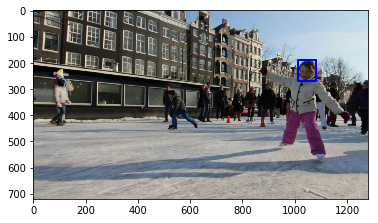

1 1.0 [1080.199951171875, 187.83999633789062, 1012.9000244140625, 187.83999633789062, 1012.9000244140625, 269.55999755859375, 1080.199951171875, 269.55999755859375]


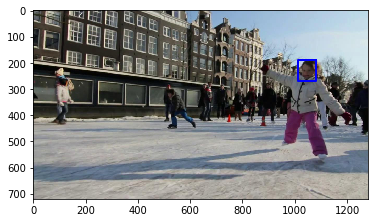

2 1.0 [1080.199951171875, 187.83999633789062, 1012.9000244140625, 187.83999633789062, 1012.9000244140625, 269.55999755859375, 1080.199951171875, 269.55999755859375]


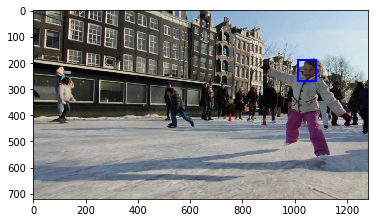

3 1.0 [1080.199951171875, 187.83999633789062, 1012.9000244140625, 187.83999633789062, 1012.9000244140625, 269.55999755859375, 1080.199951171875, 269.55999755859375]


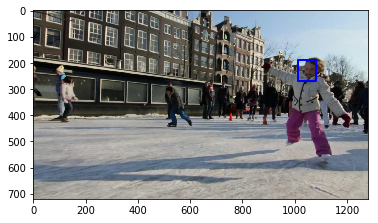

4 1.0 [1080.199951171875, 187.83999633789062, 1012.9000244140625, 187.83999633789062, 1012.9000244140625, 269.55999755859375, 1080.199951171875, 269.55999755859375]


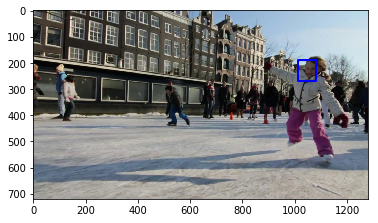

5 6.0 [1107.0999755859375, 175.42999267578125, 1039.800048828125, 175.42999267578125, 1039.800048828125, 257.1499938964844, 1107.0999755859375, 257.1499938964844]


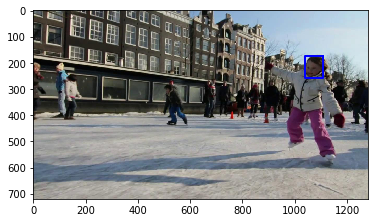

6 6.0 [1107.0999755859375, 175.42999267578125, 1039.800048828125, 175.42999267578125, 1039.800048828125, 257.1499938964844, 1107.0999755859375, 257.1499938964844]


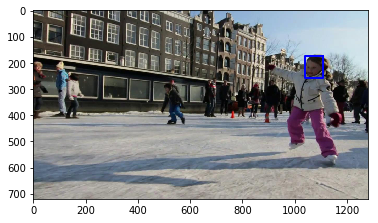

7 6.0 [1107.0999755859375, 175.42999267578125, 1039.800048828125, 175.42999267578125, 1039.800048828125, 257.1499938964844, 1107.0999755859375, 257.1499938964844]


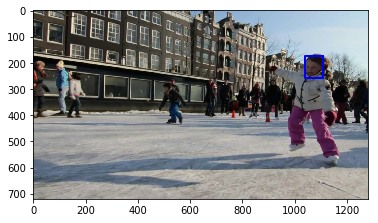

8 6.0 [1107.0999755859375, 175.42999267578125, 1039.800048828125, 175.42999267578125, 1039.800048828125, 257.1499938964844, 1107.0999755859375, 257.1499938964844]


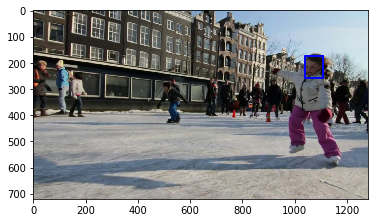

9 6.0 [1107.0999755859375, 175.42999267578125, 1039.800048828125, 175.42999267578125, 1039.800048828125, 257.1499938964844, 1107.0999755859375, 257.1499938964844]


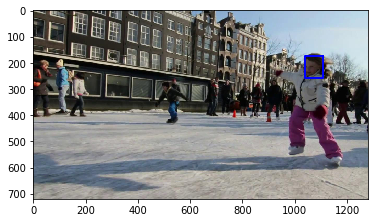

10 11.0 [1088.5, 167.16000366210938, 1021.2000122070312, 167.16000366210938, 1021.2000122070312, 248.8800048828125, 1088.5, 248.8800048828125]


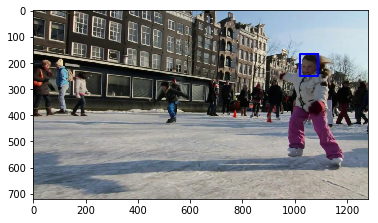

11 11.0 [1088.5, 167.16000366210938, 1021.2000122070312, 167.16000366210938, 1021.2000122070312, 248.8800048828125, 1088.5, 248.8800048828125]


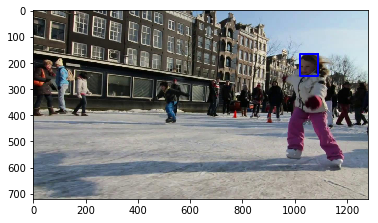

12 11.0 [1088.5, 167.16000366210938, 1021.2000122070312, 167.16000366210938, 1021.2000122070312, 248.8800048828125, 1088.5, 248.8800048828125]


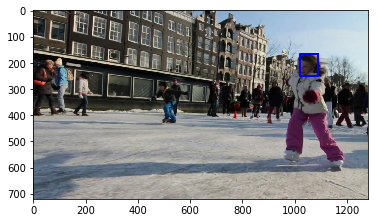

13 11.0 [1088.5, 167.16000366210938, 1021.2000122070312, 167.16000366210938, 1021.2000122070312, 248.8800048828125, 1088.5, 248.8800048828125]


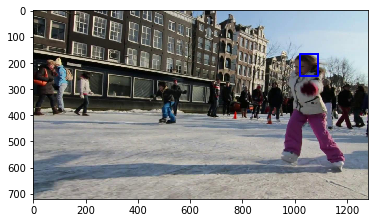

14 11.0 [1088.5, 167.16000366210938, 1021.2000122070312, 167.16000366210938, 1021.2000122070312, 248.8800048828125, 1088.5, 248.8800048828125]


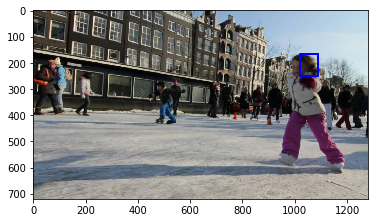

15 16.0 [1034.699951171875, 177.5, 967.4099731445312, 177.5, 967.4099731445312, 259.2200012207031, 1034.699951171875, 259.2200012207031]


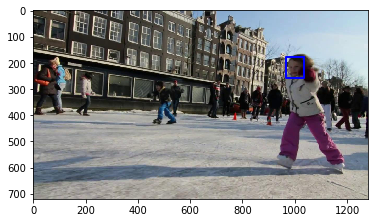

16 16.0 [1034.699951171875, 177.5, 967.4099731445312, 177.5, 967.4099731445312, 259.2200012207031, 1034.699951171875, 259.2200012207031]


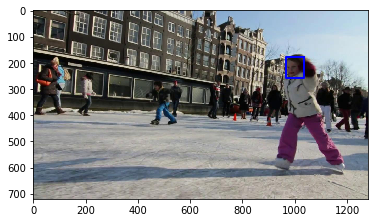

17 16.0 [1034.699951171875, 177.5, 967.4099731445312, 177.5, 967.4099731445312, 259.2200012207031, 1034.699951171875, 259.2200012207031]


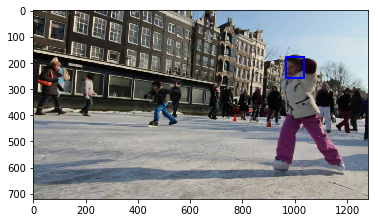

18 16.0 [1034.699951171875, 177.5, 967.4099731445312, 177.5, 967.4099731445312, 259.2200012207031, 1034.699951171875, 259.2200012207031]


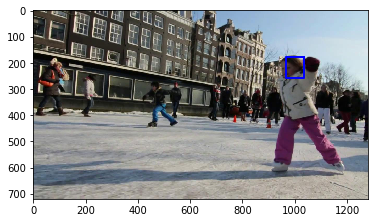

19 16.0 [1034.699951171875, 177.5, 967.4099731445312, 177.5, 967.4099731445312, 259.2200012207031, 1034.699951171875, 259.2200012207031]


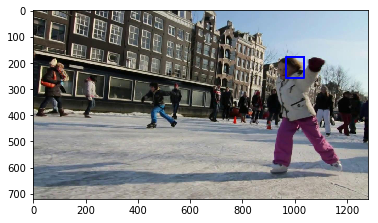

In [53]:
for n, i in enumerate(dataset["01-Light_video00001"][:20]):
    plot_single(i, "/data/alov/groundtruth/01-Light/01-Light_video00001.ann", n)
    plt.show()
    plt.close()
